# Information on the Diamond Dataset

The dataset contains prices and other attributes of approximately 54,000 round-cut diamonds. This case study is to go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, work on polishing up selected plots from the analysis so that their main points can be clearly conveyed.


1. **price:** Price in dollars. Data were collected in 2008.
2. **carat:** Diamond weight. 1 carat is equal to 0.2 grams.
3. **cut:** Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
4. **color:** Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
5. **clarity:** Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
5. **x, y, z:** Diamond length, width, and depth, respectively, in mm.
6. **table:** Ratio of the width of the top face of diamond to its overall width, as a percentage.
7. **depth:** Proportional depth of the diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only on the variables in the top five bullet points: price and the four 'C's of diamond grade. Our focus will be on answering the question about the degree of importance that each of these quality measures has on the pricing of a diamond. You can see an example report covering all of the variables in the project information lesson.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# Univariate Viz

### Univariate Viz for Numerical Data

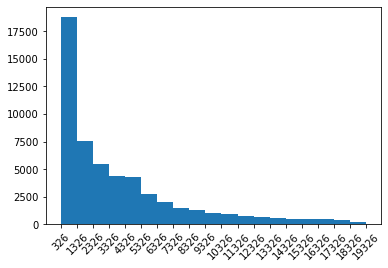

In [9]:
# univariate plot of diamond prices
xtick = np.arange(diamonds['price'].min(), diamonds['price'].max()+1000, 1000)
plt.hist(data=diamonds, x='price', bins=xtick);
# plt.xscale('log');
plt.xticks(xtick, xtick.astype('str'), rotation=45);

**Price distribution comment 1:** <span style="color:green">Diamond price follows a highly skewed distribution. We can try log scaling to see the outcome</span>

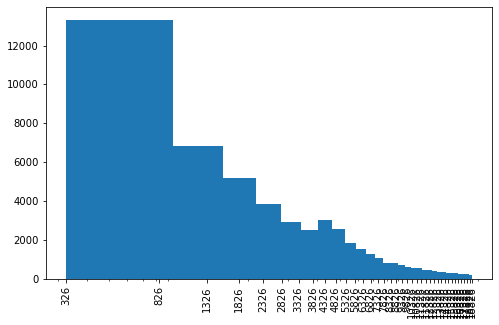

In [31]:
# univariate plot of diamond prices
plt.figure(figsize=(8, 5))
xtick = np.arange(diamonds['price'].min(), diamonds['price'].max()+500, 500)
# xtick = pd.Series([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]) * 10000
plt.hist(data=diamonds, x='price', bins= 30);
plt.xscale('log');
plt.xticks(xtick, xtick, rotation=90);

**Price distribution comment 2:** <span style="color:green">Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

(0.0, 2.0)

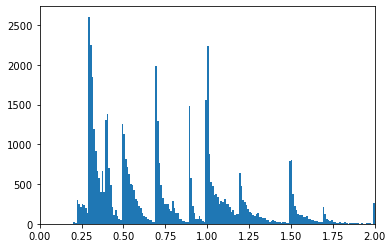

In [32]:
# univariate plot of carat weights
xtick = np.arange(diamonds['carat'].min(), diamonds['carat'].max()+0.01, 0.01)
plt.hist(data=diamonds, x='carat', bins=xtick);
# plt.xscale('log');
# plt.xticks(xtick, xtick.astype('str'), rotation=45);
plt.xlim(0, 2)

**Carat distribution comment:** <span style="color:green">There is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

### Univariate Viz for Categorical

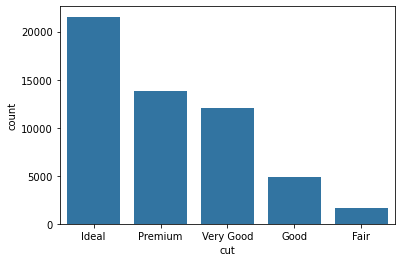

In [5]:
# univariate plots of cut
ordered_cut = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'] 
sb.countplot(data=diamonds, x='cut', color=sb.color_palette()[0], order=ordered_cut)
sb.countplot(data=diamonds, x='cut', color=sb.color_palette()[0], order=ordered_cut);

**Cut distribution comment:** <span style="color:green">The bar chart shows that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

<AxesSubplot:xlabel='color', ylabel='count'>

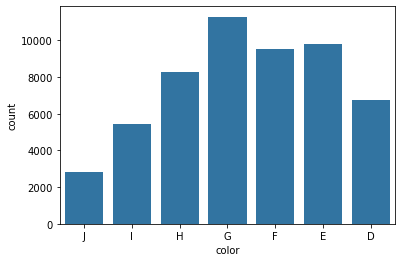

In [7]:
# univariate color
ordered_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
sb.countplot(data=diamonds, x='color', color=sb.color_palette()[0], order=ordered_color)

**Color distribution comment:** <span style="color:green">The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

<AxesSubplot:xlabel='clarity', ylabel='count'>

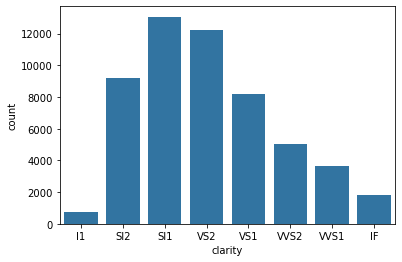

In [8]:
# univariate clarity
ordered_clarity = ['I1', 'SI2','SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sb.countplot(data=diamonds, x='clarity', color=sb.color_palette()[0], order=ordered_clarity)

**Clarity distribution comment:** <span style="color:green">There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>

# Bivariate Viz

In [33]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

In [37]:
# pre-v0.21: commented code below
# diamonds[var] = diamonds[var].astype('category', ordered = True, categories = ordinal_var_dict[var])

for var in ordinal_var_dict:
    # algorithm for v0.21 or later     
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

### Numerical vs Numerical Variable

<AxesSubplot:xlabel='price', ylabel='carat'>

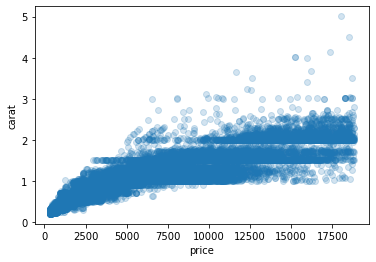

In [38]:
# bivariate plot of price vs. carat
sb.regplot(data=diamonds, x='price', y='carat', x_jitter=3, fit_reg=False, scatter_kws={'alpha':0.2})

In [72]:
# transform the 'caret' carat feature and re-plot
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

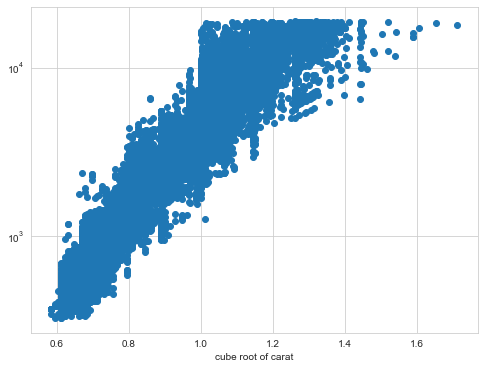

In [75]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.xlabel('cube root of carat')

plt.yscale('log')

plt.show()

In [79]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]
diamonds_1c

,carat,cut,color,clarity,depth,table,price,x,y,z,cr_carat
215,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94,1.003322
241,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03,1.003322
242,1.01,Premium,H,SI2,62.7,59.0,2788,6.31,6.22,3.93,1.003322
284,1.00,Premium,I,SI2,58.2,60.0,2795,6.61,6.55,3.83,1.000000
298,1.01,Fair,E,SI2,67.4,60.0,2797,6.19,6.05,4.13,1.003322
...,...,...,...,...,...,...,...,...,...,...,...
53692,1.00,Good,F,I1,64.2,59.0,2717,6.26,6.30,4.03,1.000000
53745,1.00,Fair,G,I1,61.7,57.0,2723,6.39,6.28,3.91,1.000000
53793,1.01,Very Good,I,SI1,63.3,59.0,2730,6.26,6.22,3.95,1.003322
53863,1.00,Fair,I,SI2,66.8,56.0,2743,6.22,6.12,4.13,1.000000


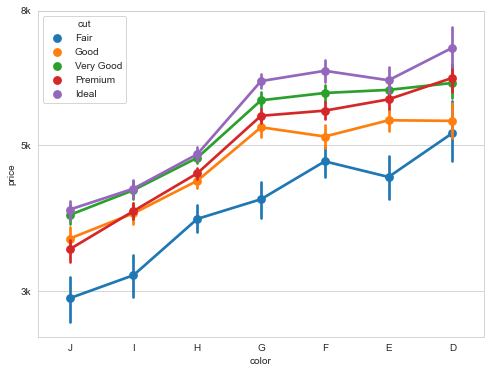

In [81]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();

### Numerical vs Categorical

<AxesSubplot:xlabel='cut', ylabel='price'>

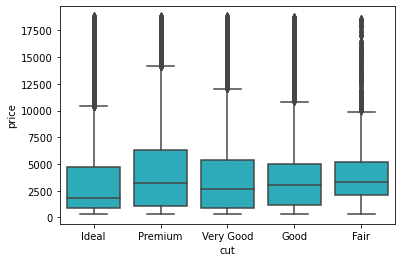

In [43]:
sb.boxplot(data=diamonds, x='cut', y='price', color=sb.color_palette()[-1], order=ordered_cut)

**Price vs. Categorical comment 1:** <span style="color:green">There's a lot of different approaches. Having created a box plot, something interesting and unintuitive is noticed: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

<AxesSubplot:xlabel='cut', ylabel='price'>

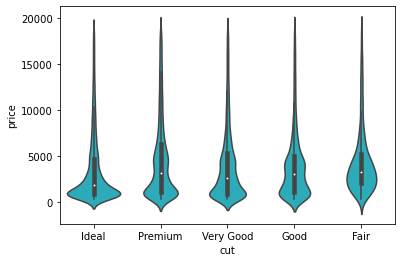

In [44]:
sb.violinplot(data=diamonds, x='cut', y='price', color=sb.color_palette()[-1], order=ordered_cut)

**Price vs. Categorical comment 2:** <span style="color:green">With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

<AxesSubplot:xlabel='cut', ylabel='price'>

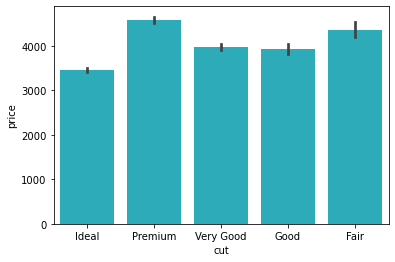

In [45]:
# average price for the cut diamond quality 
sb.barplot(data=diamonds, x='cut', y='price', color=sb.color_palette()[-1], order=ordered_cut)

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

<AxesSubplot:xlabel='cut', ylabel='carat'>

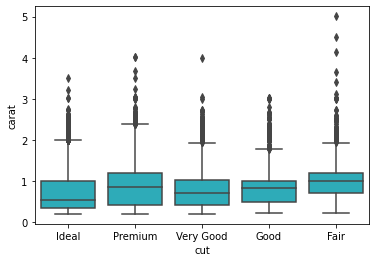

In [46]:
sb.boxplot(data=diamonds, x='cut', y='carat', color=sb.color_palette()[-1], order=ordered_cut)

<AxesSubplot:xlabel='cut', ylabel='carat'>

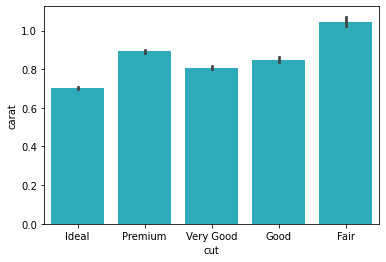

In [47]:
# average price for the cut diamond quality 
sb.barplot(data=diamonds, x='cut', y='carat', color=sb.color_palette()[-1], order=ordered_cut)

# Multivariate Viz

### 1 Categorical vs 2 Numerical

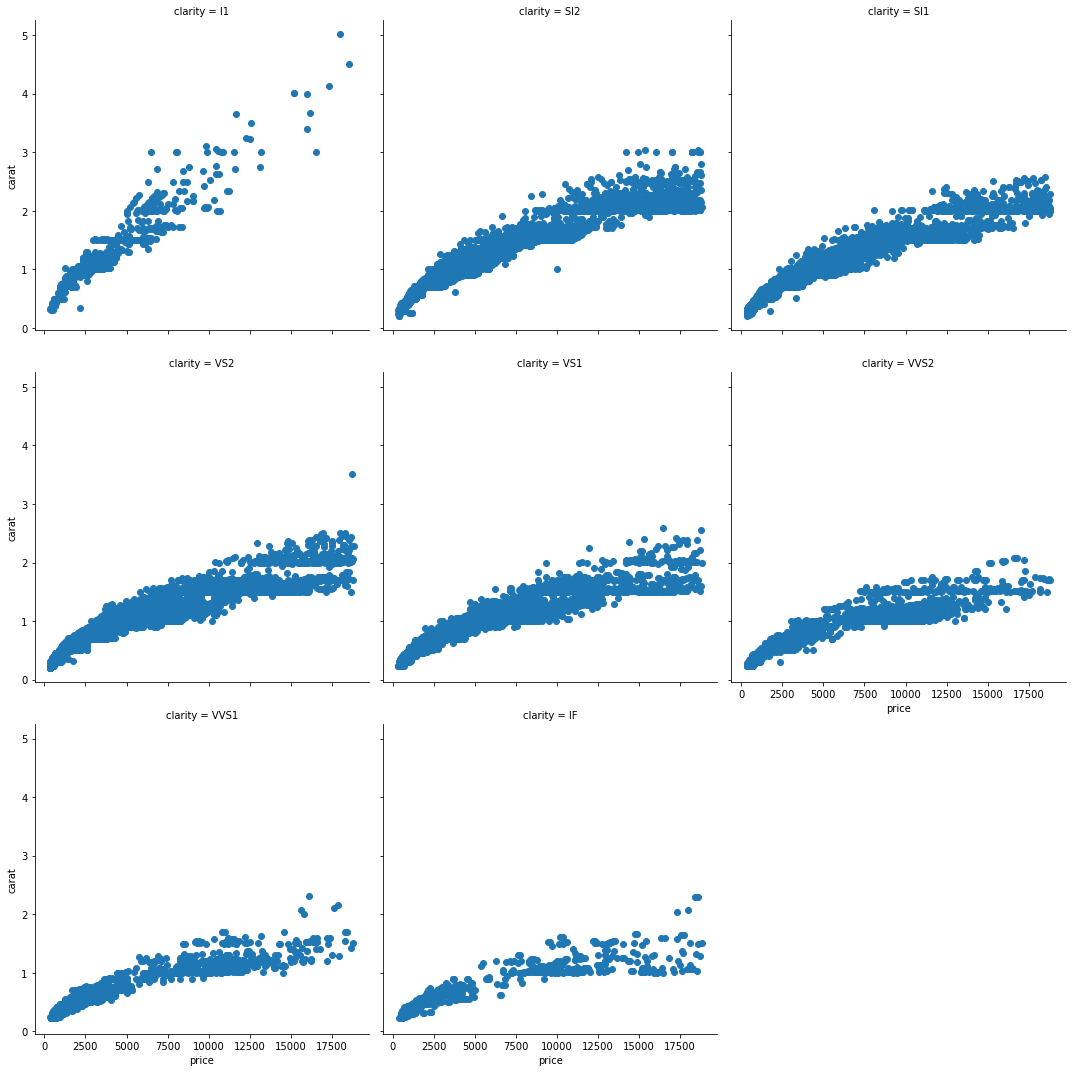

In [51]:
# multivariate plot of price by carat weight, and clarity
g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=3, height=5)
g.map(plt.scatter, 'price', 'carat')

### 2 Categorical vs 1 Numerical

<AxesSubplot:xlabel='cut', ylabel='price'>

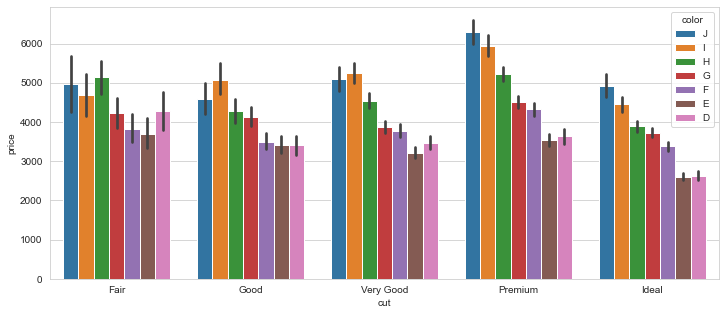

In [52]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
sb.set_style('whitegrid')
plt.figure(figsize=(12,5))
sb.barplot(data=diamonds, x='cut', y='price', hue='color')
# plt.legend()

In [56]:
# using heatmap for the above plot
multi = diamonds.groupby(['cut', 'color'])['price'].mean().reset_index(name='average')

In [58]:
multi = multi.pivot(index='cut', columns='color', values='average')
multi

color,J,I,H,G,F,E,D
cut,,,,,,,
Fair,4975.655462,4685.445714,5135.683168,4239.254777,3827.003205,3682.312500,4291.061350
Good,4574.172638,5078.532567,4276.254986,4123.482204,3495.750275,3423.644159,3405.382175
Very Good,5103.513274,5255.879568,4535.390351,3872.753806,3778.820240,3214.652083,3470.467284
Premium,6294.591584,5946.180672,5216.706780,4500.742134,4324.890176,3538.914420,3631.292576
Ideal,4918.186384,4451.970377,3889.334831,3720.706388,3374.939362,2597.550090,2629.094566


<AxesSubplot:xlabel='color', ylabel='cut'>

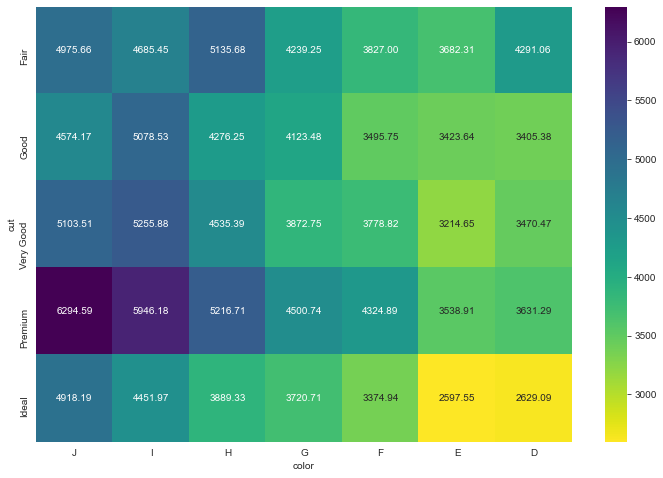

In [71]:
plt.figure(figsize=(12, 8))
sb.heatmap(multi, annot=True, fmt='.2f', cmap='viridis_r')